In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
digits = pd.read_csv("../data/mnist.csv")
digits.shape

(1560, 6)

In [11]:
digits["true_label"].value_counts()

true_label
4    156
2    156
1    156
3    156
5    156
6    156
7    156
8    156
9    156
0    156
Name: count, dtype: int64

<Axes: xlabel='true_label', ylabel='Count'>

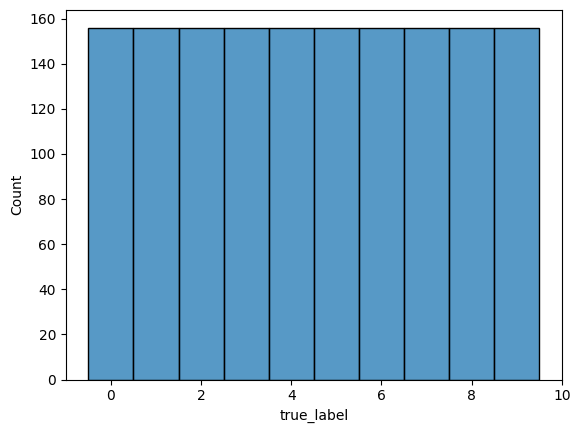

In [12]:
sns.histplot(digits, x="true_label", discrete=True)

## September

In [13]:
# get confidence distribution
sept = digits[digits["timestamp"].str[:1] == "9"]
oct = digits[digits["timestamp"].str[:2] == "10"]
nov = digits[digits["timestamp"].str[:2] == "11"]

In [14]:
sept.shape  # might need to fake data to create some more shapes (will need to use original model)

(527, 6)

In [15]:
oct.shape

(503, 6)

In [16]:
nov.shape

(530, 6)

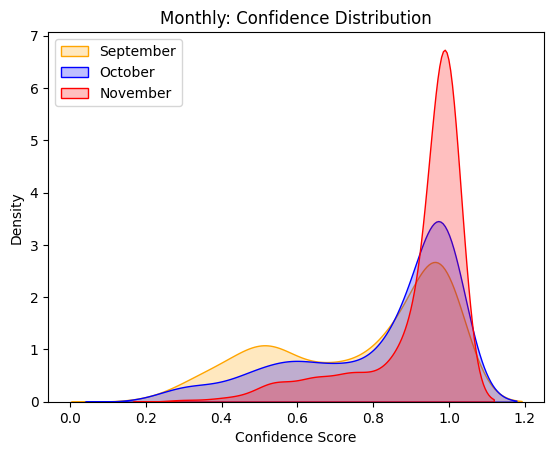

In [17]:
sns.kdeplot(sept, x="confidence", color="orange", fill=True, label="September")
sns.kdeplot(oct, x="confidence", color="blue", fill=True, label="October")
sns.kdeplot(nov, x="confidence", color="red", fill=True, label="November")
plt.title("Monthly: Confidence Distribution")  # no retrain at this point
plt.xlabel("Confidence Score")
plt.ylabel("Density")
plt.legend()

In [18]:
# dimensionality reduction preprocessing
import numpy as np
from PIL import Image

def load_image_as_vector(path):
    path = f".{path}"
    img = Image.open(path).convert("L")  # grayscale
    img = img.resize((28, 28))
    arr = np.array(img).flatten() / 255.0  # normalize
    return arr

# create matrix of image vectors
image_vectors = np.stack([load_image_as_vector(p) for p in digits["img_path"]])
print(image_vectors.shape)  # (n_samples, 784)


# PCA analysis
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(image_vectors)

digits["pca1"] = pca_result[:, 0]
digits["pca2"] = pca_result[:, 1]

# TSNE analysis
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(image_vectors)

digits["tsne1"] = tsne_result[:, 0]
digits["tsne2"] = tsne_result[:, 1]




(1560, 784)


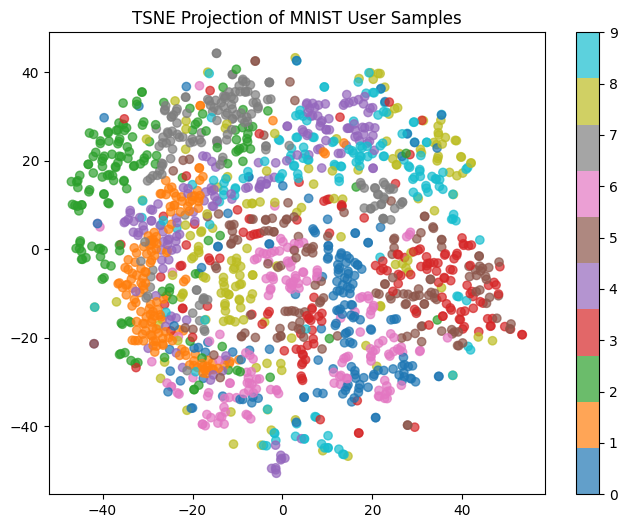

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(digits["tsne1"], digits["tsne2"], c=digits["true_label"], cmap="tab10", alpha=0.7)
plt.colorbar()
plt.title("TSNE Projection of MNIST User Samples")
plt.show()


In [20]:
tsne = TSNE(n_components=3, perplexity=30, n_iter=3000)
tsne_result = tsne.fit_transform(image_vectors)
print(tsne_result)

[[-37.210133   21.052225  -26.852451 ]
 [-38.193165   12.449155   35.39642  ]
 [ 17.01644   -52.249577  -22.9118   ]
 ...
 [-32.849537  -46.316822  -13.972119 ]
 [-57.673016   51.646904   15.868019 ]
 [ 20.147736   41.45828    -5.8552666]]


0       4
1       2
2       1
3       1
4       1
       ..
1555    5
1556    6
1557    7
1558    8
1559    9
Name: true_label, Length: 1560, dtype: int64


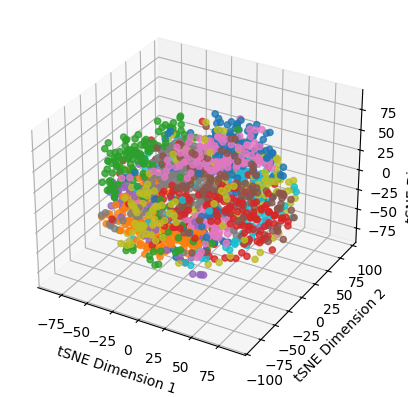

In [21]:
# graph visualization
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
colors = digits.true_label
print(colors)
ax.scatter(
    tsne_result[:,0],
    tsne_result[:,1],
    tsne_result[:,2],
    c=colors,
    cmap="tab10",
    alpha=0.8
)

ax.set_xlabel("tSNE Dimension 1")
ax.set_ylabel("tSNE Dimension 2")
ax.set_zlabel("tSNE Dimension 3")
plt.show()